### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Top 10 paesi per consumo totale di alcol (in litri di alcol puro):
                 country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4

Media consumo annuale:
- Birra: 106.16 servings
- Vino: 49.45 servings
- Distillati: 80.99 servings

Paese con massimo alcohol_index: Andorra (231.67)

Paesi con più di 100 birre all’anno:
                country  beer_servings
3              Andorra            245
4               Angola            217
5    Antigua & Barbuda           

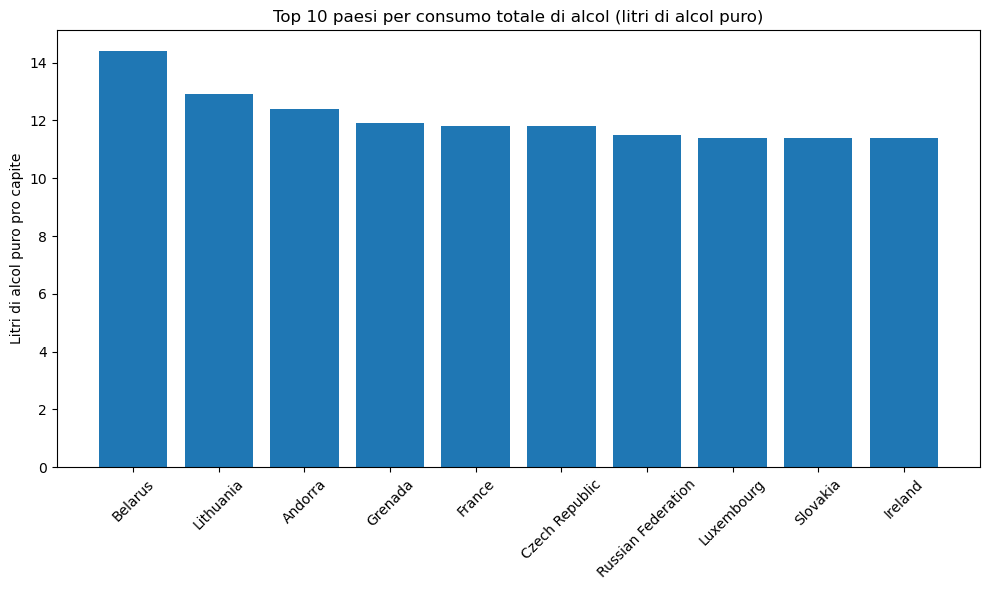

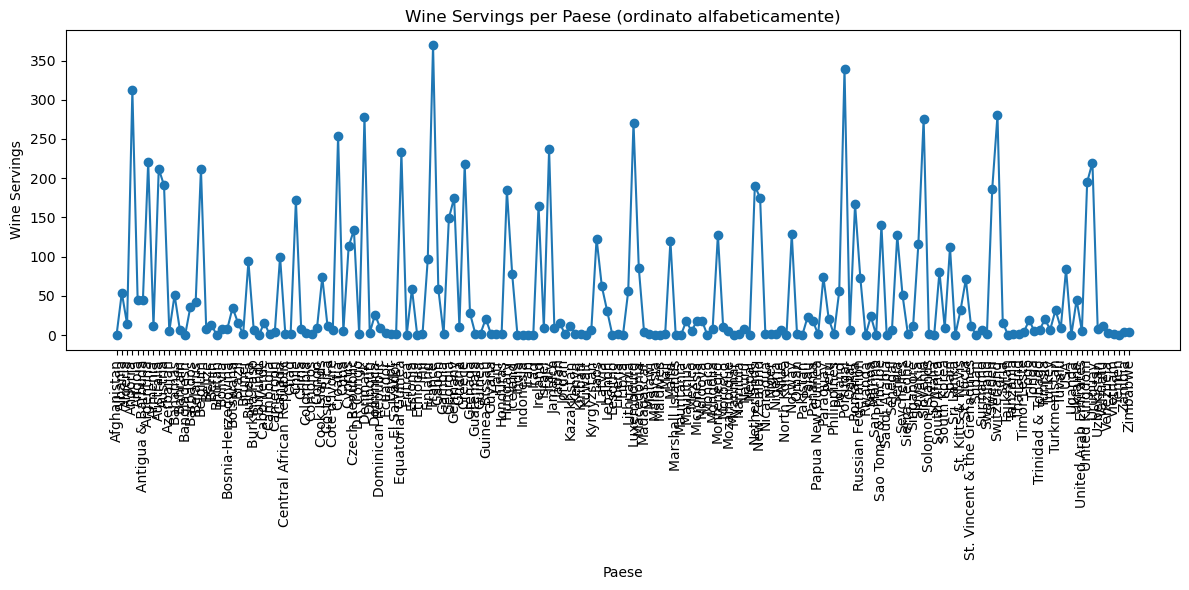

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carica i dati
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")


# 2. Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (decrescente)
top10_total = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
print("Top 10 paesi per consumo totale di alcol (in litri di alcol puro):\n", top10_total[['country', 'total_litres_of_pure_alcohol']])

# 3. Calcola la media del consumo di birra, vino e distillati
media_birra = df['beer_servings'].mean()
media_vino = df['wine_servings'].mean()
media_distillati = df['spirit_servings'].mean()
print(f"\nMedia consumo annuale:")
print(f"- Birra: {media_birra:.2f} servings")
print(f"- Vino: {media_vino:.2f} servings")
print(f"- Distillati: {media_distillati:.2f} servings")

# 4. Crea colonna alcohol_index
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3

# 5. Trova il paese con massimo alcohol_index
max_index_row = df.loc[df['alcohol_index'].idxmax()]
print(f"\nPaese con massimo alcohol_index: {max_index_row['country']} ({max_index_row['alcohol_index']:.2f})")

# 6. Filtra i paesi con più di 100 birre all’anno
piu_100_birre = df[df['beer_servings'] > 100]
print(f"\nPaesi con più di 100 birre all’anno:\n", piu_100_birre[['country', 'beer_servings']])

# 7. Bar chart dei 10 paesi con più consumo totale
plt.figure(figsize=(10,6))
plt.bar(top10_total['country'], top10_total['total_litres_of_pure_alcohol'])
plt.title("Top 10 paesi per consumo totale di alcol (litri di alcol puro)")
plt.ylabel("Litri di alcol puro pro capite")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Line plot di wine_servings ordinato per paese
df_sorted_wine = df.sort_values(by='country')
plt.figure(figsize=(12,6))
plt.plot(df_sorted_wine['country'], df_sorted_wine['wine_servings'], marker='o')
plt.title("Wine Servings per Paese (ordinato alfabeticamente)")
plt.xlabel("Paese")
plt.ylabel("Wine Servings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Statistiche per paese:
                  job_country  stipendio_medio  conteggio_offerte  \
9                     Belarus    400000.000000                  1   
80                     Russia    292500.000000                  4   
7                     Bahamas    201511.619048                 21   
27         Dominican Republic    157500.000000                  1   
69   Northern Mariana Islands    155485.500000                  1   
25              Côte d'Ivoire    147500.000000                  1   
63                    Namibia    140857.142857                  7   
90                      Sudan    134051.577942               1623   
102             United States    126134.487958              15766   
17                      Chile    124918.454545                 11   

     stipendio_min  stipendio_max  
9         400000.0       400000.0  
80        250000.0       320000.0  
7         173500.0       284016.0  
27        157500.0       157500.0  
69        155485.5       155485.5  
2

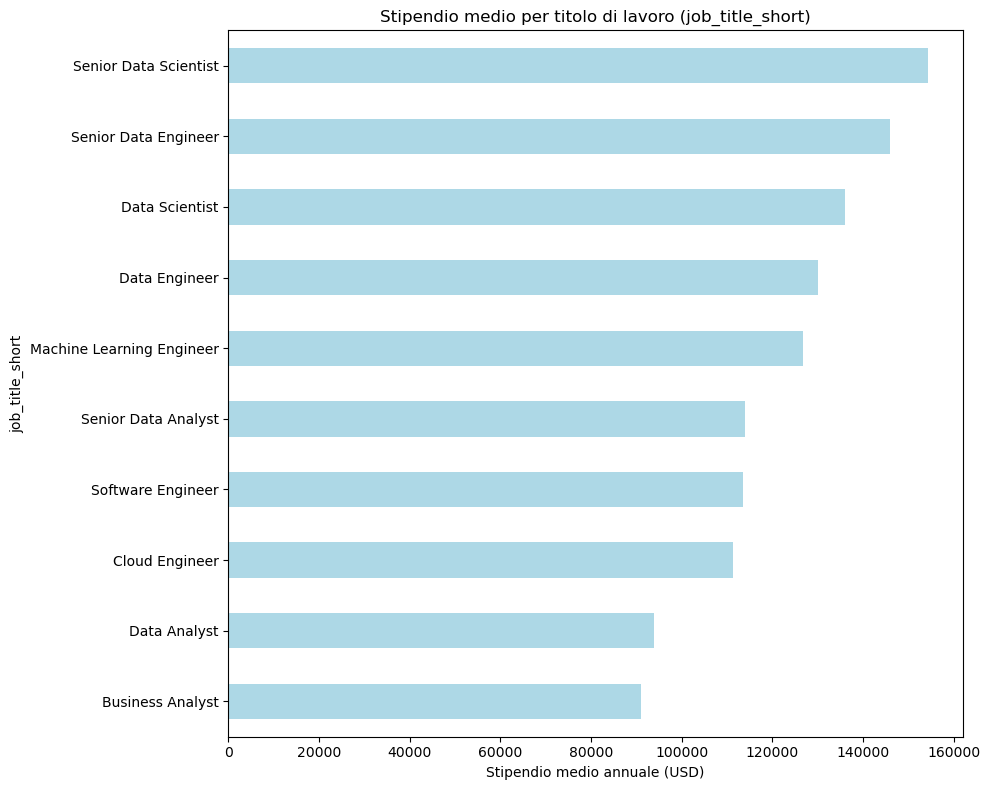

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Carica il dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Converti la colonna delle date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Rimuovi righe con stipendio mancante
df = df.dropna(subset=['salary_year_avg'])

# ANALISI PER PAESE
paesi_stats = df.groupby('job_country').agg(
    stipendio_medio=('salary_year_avg', 'mean'),
    conteggio_offerte=('job_title_short', 'count'),
    stipendio_min=('salary_year_avg', 'min'),
    stipendio_max=('salary_year_avg', 'max')
).reset_index().sort_values(by='stipendio_medio', ascending=False)

# Mostra le prime righe della tabella
print("Statistiche per paese:")
print(paesi_stats.head(10))

# ANALISI PER RUOLO: stipendio medio per job_title_short
df_plot = df.dropna(subset=['job_title_short'])
stipendi_per_ruolo = df_plot.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

# GRAFICO A BARRE ORIZZONTALI
plt.figure(figsize=(10, 8))
stipendi_per_ruolo.plot(kind='barh', color='lightblue')
plt.xlabel("Stipendio medio annuale (USD)")
plt.title("Stipendio medio per titolo di lavoro (job_title_short)")
plt.tight_layout()
plt.show()
